# Data Exercise TSV file

Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1 to 135
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        135 non-null    object 
 1   _r        135 non-null    object 
 2   _RAJ2000  135 non-null    object 
 3   _DEJ2000  135 non-null    object 
 4   RAJ2000   135 non-null    float64
 5   DEJ2000   135 non-null    float64
 6   objID     135 non-null    object 
 7   f_objID   135 non-null    object 
 8   Qual      135 non-null    object 
 9   Ns        135 non-null    object 
 10  Nd        135 non-null    object 
 11  gmag      135 non-null    float64
 12  e_gmag    135 non-null    float64
 13  gFlags    135 non-null    object 
 14  rmag      135 non-null    float64
 15  e_rmag    135 non-null    float64
 16  rFlags    135 non-null    object 
 17  imag      135 non-null    float64
 18  e_imag    135 non-null    float64
 19  iFlags    135 non-null    object 
 20  zmag      135 non-null    fl

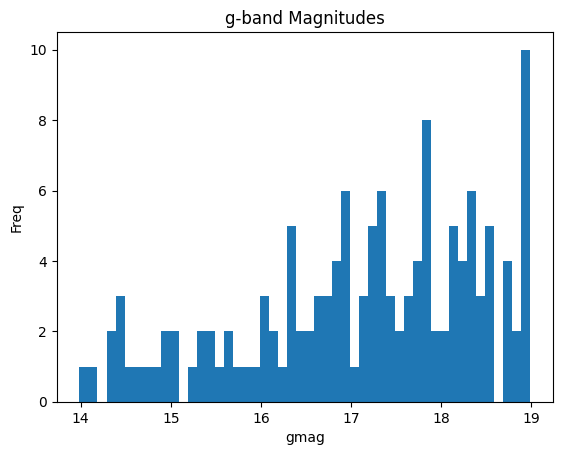

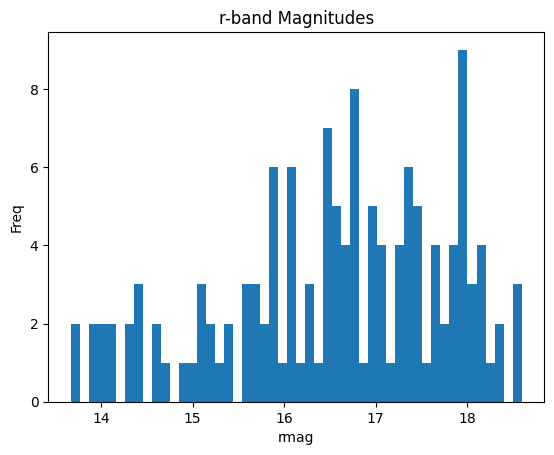

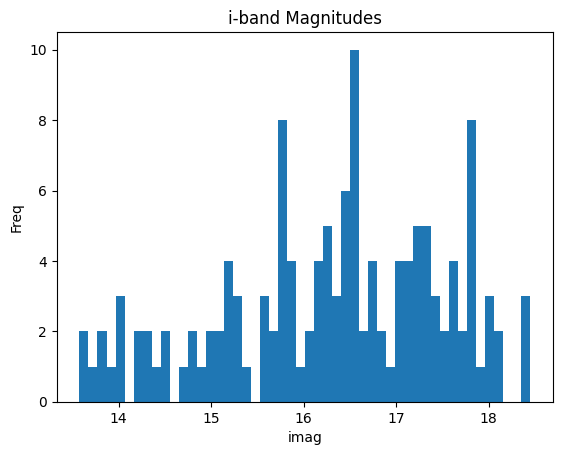

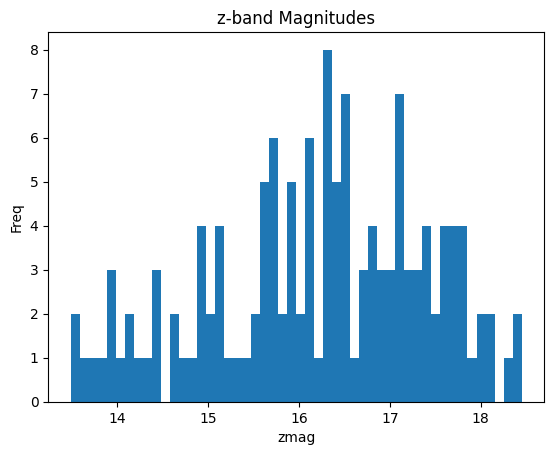

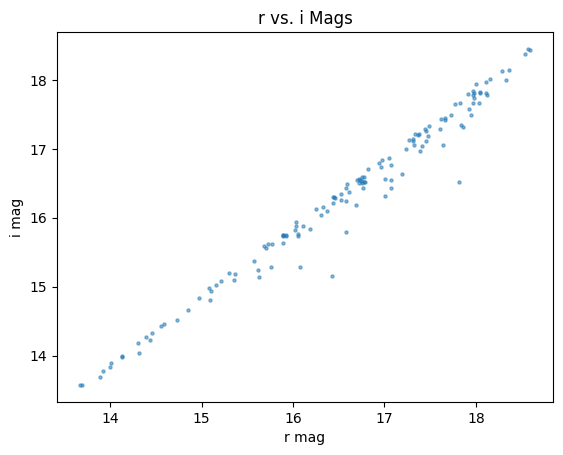

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fp = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise\psdr1_new.tsv"

try:
    df = pd.read_csv(fp, delimiter='\t', comment='#', header=None)
    fr = df.iloc[0]
    if '\t' in fr.str.cat(sep='\t'):
        df = pd.read_csv(fp, delimiter='\t', comment='#', header=0)
    else:
        cols = ['ID', '_r', '_RAJ2000', '_DEJ2000', 'RAJ2000', 'DEJ2000', 'objID', 'f_objID', 'Qual', 'Ns', 'Nd', 'gmag', 'e_gmag', 'gFlags', 'rmag', 'e_rmag', 'rFlags', 'imag', 'e_imag', 'iFlags', 'zmag', 'e_zmag', 'zFlags']
        df.columns = cols

    df = df[df['ID'] != '--']

    for col in ['RAJ2000', 'DEJ2000', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

except FileNotFoundError:
    print(f"Error: '{fp}' not found.")
    exit()
except pd.errors.ParserError:
    print("Error: Parsing failed.")
    exit()
except Exception as e:
    print(f"Error: {e}")
    exit()

print("Summary:")
print(df.info())
print("\nFirst 5 rows:\n", df.head())
print("\nStats:\n", df.describe())

if 'objID' in df.columns:
    num_objs = df['objID'].nunique()
    print(f"\nUnique objects: {num_objs}")

if 'Qual' in df.columns:
    print("\nQuality Distribution:")
    print(df['Qual'].value_counts())

filt = ['g', 'r', 'i', 'z']
for f in filt:
    if f'{f}mag' in df.columns:
        plt.figure()
        plt.hist(df[f'{f}mag'].dropna(), bins=50)
        plt.title(f'{f}-band Magnitudes')
        plt.xlabel(f'{f}mag')
        plt.ylabel('Freq')
        plt.show()

if 'rmag' in df.columns and 'imag' in df.columns:
    plt.figure()
    plt.scatter(df['rmag'], df['imag'], s=5, alpha=0.5)
    plt.title('r vs. i Mags')
    plt.xlabel('r mag')
    plt.ylabel('i mag')
    plt.show()
